In [1]:
from torchvision.datasets import MNIST

download_root = './MNIST_DATASET'
train_dataset = MNIST(download_root, train=True, download=True)


In [15]:
import torch
import numpy as np
import cv2

from denoising_diffusion_pytorch import Unet, GaussianDiffusion

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8)
).to(device)

diffusion = GaussianDiffusion(
    model,
    image_size = 128,
    timesteps = 1000,   # number of steps
    loss_type = 'l1'    # L1 or L2
).to(device)


# training_images = torch.rand(8, 3, 128, 128) # images are normalized from 0 to 1
MNIST_images = train_dataset.data.unsqueeze(1).repeat(1,3,1,1).numpy()
training_images = torch.zeros(8,3,128,128)
# print(MNIST_images.shape)
for i in range(8):
    newsize = (128,128)
    img = cv2.resize(MNIST_images[i].transpose(1,2,0),newsize)
    training_images[i] = torch.Tensor(img.transpose(2,0,1))/255.0
# print(training_images.shape)
training_images = training_images.to(device)
loss = diffusion(training_images)
loss.backward()
# after a lot of training

sampled_images = diffusion.sample(batch_size = 4)
sampled_images.shape # (4, 3, 128, 128)

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

torch.Size([4, 3, 128, 128])

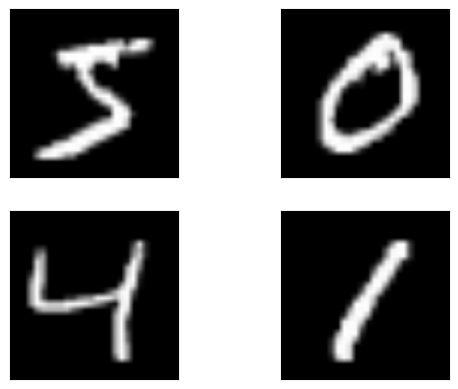

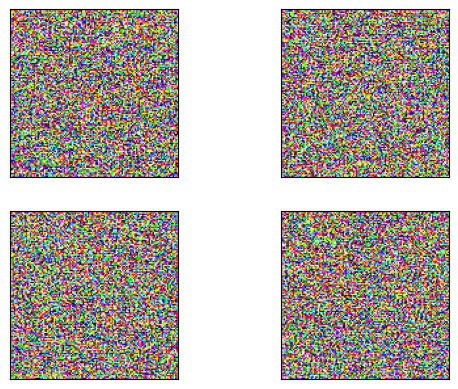

In [17]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

fig = plt.figure()
for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    img = (training_images[i,:].to('cpu').squeeze(0).permute(1,2,0)).numpy()
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_xticks([]), ax.set_yticks([])

fig = plt.figure()
for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    img = (sampled_images[i,:].to('cpu').squeeze(0).permute(1,2,0)).numpy()
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_xticks([]), ax.set_yticks([])

#plt.show()